In [8]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Уравнение теплопроводности имеет следующий вид

$$\frac{\partial{u}}{\partial{t}} = a\frac{\partial^2{u}}{\partial{x^2}},\\u|_{t=0}=\begin{cases}
    0 & \text{если } x > 0 \\ % & is your "\tab"-like command (it's a tab alignment character)
    1 & \text{если } x = 0
\end{cases}$$

### Аппроксимируем правым уголком

$$\frac{u_j^{k+1} - u_j^k}{\Delta t} = a\frac{u_{j+1}^k-2u_j^k+u_{j-1}^k}{\Delta x^2}$$

In [13]:
def get_timestep(
    a: float,
    dx: float,
    cur: float
) -> float:
    return (dx**2)*cur/(2 * a)

In [9]:
def num_scheme(
    u: np.ndarray,
    t: float,
    a: float,
    h: float
) -> np.ndarray:
    u_new = [1]
    for i in range(1, len(u)-1):
        u_new.append(u[i] + a*t*(u[i+1]-2*u[i]+u[i-1])/(h**2))
    u_new.append(0)
    return u_new

In [10]:
a = 0.5
n = 500
h = 1/n
t = get_timestep(a, h, 1/2)
x = np.linspace(0, 1, n)

u_origin = [0]*n
u_origin[0] = 1

MovieWriter ffmpeg unavailable; using Pillow instead.


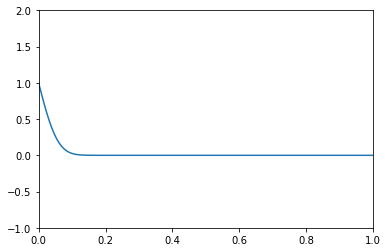

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-1, 2))
line, = ax.plot([], [])

def animate(k: int):
    global u_origin, t, a, h
    u, u_new = u_origin[:], u_origin[:]
    
    for i in range(k):
        u_new = num_scheme(u, t, a, h)
        u = u_new[:]
    
    line.set_data(np.linspace(0, 1, n), u_new)
    return line,

def init():
    line.set_data(np.linspace(0, 1, n), u_origin)
    return line,

nframes = 1000
anim = FuncAnimation(fig, animate, init_func=init, frames=nframes, interval=20, blit=True, repeat=True)
anim.save('heat.gif')

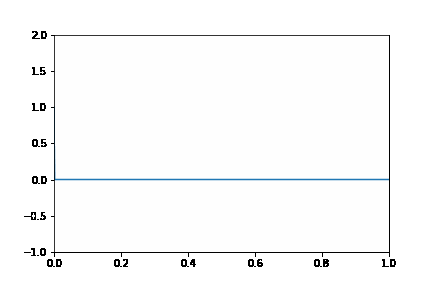

In [12]:
from IPython.display import Image
with open('heat.gif','rb') as file:
    display(Image(file.read()))